# Part 1

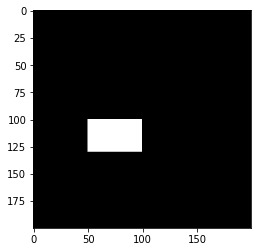

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math

empty_pic=np.zeros((200,200),dtype=np.uint8)
for i in range(100,130):
    for j in range(50,100):
        empty_pic[i][j]=255

plt.figure(figsize=(4,4))
plt.imshow(empty_pic,cmap="gray")
plt.show()

# Part 2

In [2]:
def transform(img,transform_matrix):
    ans=img.copy()
    ans=np.float32(ans)
    inverted_transform_matrix=np.linalg.inv(transform_matrix)
    for i in range(ans.shape[0]):
        for j in range(ans.shape[1]):
            try:
                new_x,new_y,_=np.dot(inverted_transform_matrix,np.array([i,j,1]).T)
                new_x,new_y=int(new_x),int(new_y)
                ans[i][j]=img[new_x][new_y]
            except:
                pass
    return ans

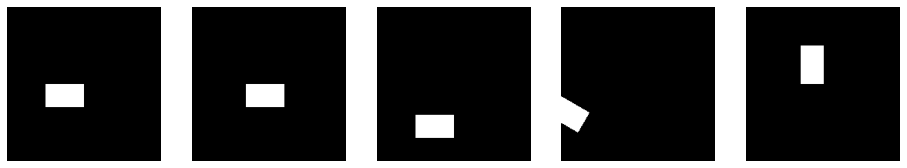

In [3]:
transformed_a=transform(empty_pic,np.array([[1,0,0],[0,1,20],[0,0,1]]))

transformed_b=transform(empty_pic,np.array([[1,0,40],[0,1,0],[0,0,1]]))

rotation_matrix=np.zeros((3,3))
rotation_matrix[0][0]=math.cos(math.radians(-30))
rotation_matrix[0][1]=-1*math.sin(math.radians(-30))
rotation_matrix[1][0]=math.sin(math.radians(-30))
rotation_matrix[1][1]=math.cos(math.radians(-30))
rotation_matrix[2][2]=1
transformed_c=transform(empty_pic,rotation_matrix)


rotation_matrix=np.zeros((3,3))
rotation_matrix[0][0]=math.cos(math.radians(-90))
rotation_matrix[0][1]=-1*math.sin(math.radians(-90))
rotation_matrix[1][0]=math.sin(math.radians(-90))
rotation_matrix[1][1]=math.cos(math.radians(-90))
rotation_matrix[2][2]=1
transformed_d=transform(empty_pic,rotation_matrix)

plt.figure(figsize=(16,8))
plt.subplot(1,5,1)
plt.imshow(empty_pic,cmap='gray')
plt.axis('off')
plt.subplot(1,5,2)
plt.imshow(transformed_a,cmap='gray')
plt.axis('off')
plt.subplot(1,5,3)
plt.imshow(transformed_b,cmap='gray')
plt.axis('off')
plt.subplot(1,5,4)
plt.imshow(transformed_c,cmap='gray')
plt.axis('off')
plt.subplot(1,5,5)
plt.imshow(transformed_d,cmap='gray')
plt.axis('off')

plt.show()

# Part 3

In [4]:
def fourier_transform(img):
    f=np.fft.fft2(img)
    fshift=np.fft.fftshift(f)
    return fshift

In [5]:
def show_fourier(img):
    fourier=fourier_transform(np.float32(img))+1
    log_abs_fourier=np.log(np.abs(fourier))
    phase=np.angle(fourier)
    plt.figure(figsize=(9,3))
    plt.subplot(1,3,1)
    plt.imshow(img,cmap="gray")
    plt.axis('off')
    plt.subplot(1,3,2)
    plt.imshow(log_abs_fourier,cmap="gray")
    plt.axis('off')
    plt.subplot(1,3,3)
    plt.imshow(phase,cmap="gray")
    plt.axis('off')
    plt.show()

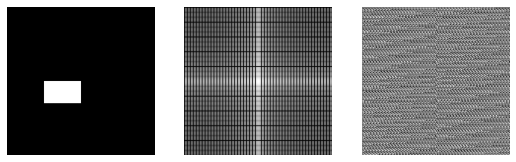

In [6]:
show_fourier(empty_pic)

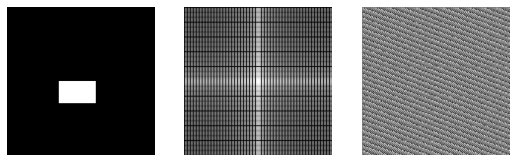

In [7]:
show_fourier(transformed_a)

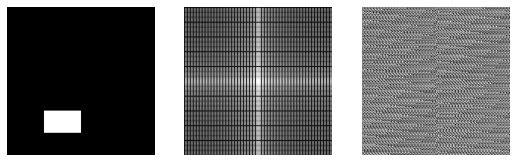

In [8]:
show_fourier(transformed_b)

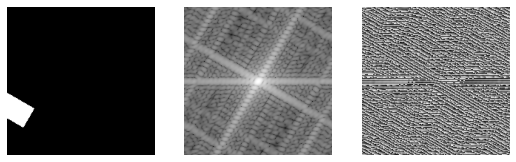

In [9]:
show_fourier(transformed_c)

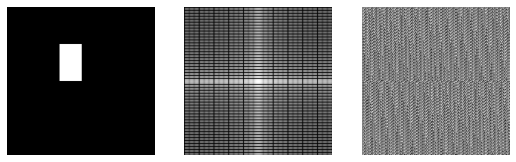

In [10]:
show_fourier(transformed_d)

# Part 4

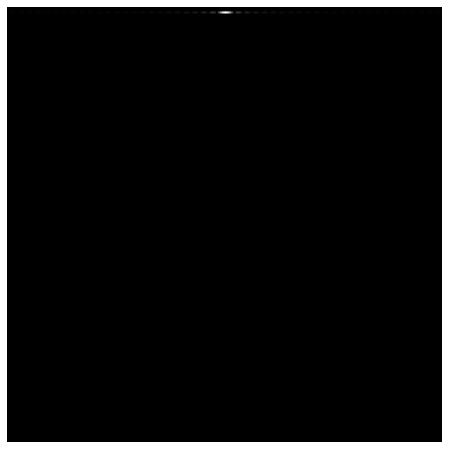

In [11]:
empty_fourier=fourier_transform(np.float32(empty_pic))

y1=[i for i in range(200)]
c1=np.abs(empty_fourier[2])

y2=[32 for i in range(200)]
c2=np.abs(empty_fourier[:,32])

ans=np.zeros((200,200),dtype=np.float32)

for i in range(len(y1)):
    ans[2][i]=c1[i]

for i in range(len(y2)):
    ans[i][32]=c2[i]

plt.figure(figsize=(8,8))
plt.imshow(ans,cmap="gray")
plt.axis('off')
plt.show()

# Part 5

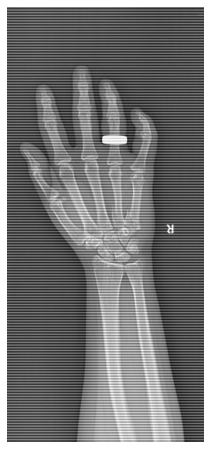

In [12]:
img=cv2.imread('metacarpal.png',cv2.IMREAD_GRAYSCALE)
img.dtype

plt.figure(figsize=(8,8))
plt.imshow(img, cmap="gray")
plt.axis('off')
plt.show()

# Part 6

In [13]:
fourier_img=fourier_transform(np.float32(img))

# Part 7

In [14]:
def inverse_fourier(f):
    f_ishift = np.fft.ifftshift(f)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back

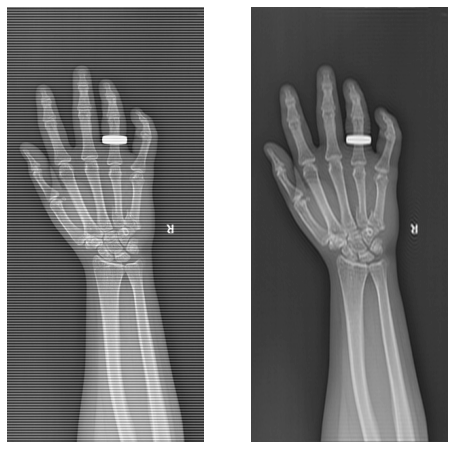

In [15]:
hfilter = np.zeros((img.shape[0], img.shape[1]), dtype=np.float32)

P,Q = img.shape

for i in range(hfilter.shape[0]):
    for j in range(hfilter.shape[1]):
        if math.sqrt((i-P/2)**2 + (j-Q/2)**2) >= 100:
            hfilter[i][j] = 1
            
hfilter_applied_fourier_img = fourier_img*(1-hfilter)
final_img = inverse_fourier(hfilter_applied_fourier_img)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(final_img, cmap="gray")
plt.axis('off')
plt.show()


# Part 8

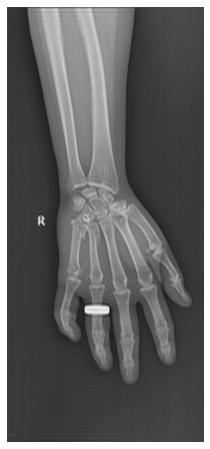

In [16]:
def transform_complex(img):
    rotation_matrix=np.zeros((3,3))
    rotation_matrix[0][0]=math.cos(math.radians(-180))
    rotation_matrix[0][1]=-1*math.sin(math.radians(-180))
    rotation_matrix[1][0]=math.sin(math.radians(-180))
    rotation_matrix[1][1]=math.cos(math.radians(-180))
    rotation_matrix[2][2]=1
    
    ans=img.copy()
    inverted_transform_matrix=np.linalg.inv(rotation_matrix)
    for i in range(ans.shape[0]):
        for j in range(ans.shape[1]):
            try:
                new_x,new_y,_=np.dot(inverted_transform_matrix,np.array([i,j,1]).T)
                new_x,new_y=int(new_x),int(new_y)
                ans[i][j]=img[new_x][new_y]
            except:
                pass
    return ans

rotated_fourier_img=transform_complex(hfilter_applied_fourier_img)

plt.figure(figsize=(8,8))
plt.imshow(inverse_fourier(rotated_fourier_img),cmap='gray')
plt.axis('off')
plt.show()

# Part 9

In [17]:
output = inverse_fourier(rotated_fourier_img)

# Part 10

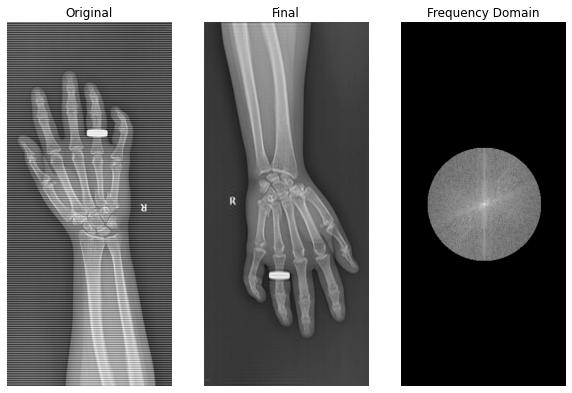

In [18]:
plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(img,cmap="gray")
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Final")
plt.imshow(output,cmap="gray")
plt.axis('off')

plt.subplot(1,3,3)
plt.title("Frequency Domain")
plt.imshow(np.log(np.abs(rotated_fourier_img+1)),cmap="gray")
plt.axis('off')
plt.show()